# Assignment 2 (William Cromar)

Complete dataset (data.csv) includes residential, single family homes in Orange County FL, from the past three years (as of March 15, 2017). Sales less than $100 dollars have been excluded from the dataset.

Data was queried from the Orange County Property Appraiser's website, using the Sales Search utility. (Link: http://www.ocpafl.org/searches/ParcelSearch.aspx)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data

notes about data

In [18]:
# Read in the data from the CSV
data_raw = pd.read_csv("data.csv")

# Only include sales of type "SALE QUALIFIED AS RESULT OF DEED EXAMINATION" (code 1)
data_raw = data_raw[data_raw["SaleDescriptionCode"] == 1]

# Pull the year out of each year's time stamp
# Time stamps follow the form MM/DD/YYYY HH:MM:SS
data_raw["Year Sold"] = data_raw["Date of Sale"].map(lambda timestamp: int(timestamp.split(" ")[0].split("/")[2]))

# I'm also going to drop datapoints that have an average year built after they were sold
# ie building plans that were sold
data_raw = data_raw[data_raw["Average Year Built"] <= data_raw["Year Sold"]]

# Determine the house's age at the time of sale
data_raw["Age at Sale"] = data_raw["Year Sold"] - data_raw["Average Year Built"]

print data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6197 entries, 0 to 9999
Data columns (total 33 columns):
Parcel ID                  6197 non-null object
Property Address           6197 non-null object
Street Number              6197 non-null int64
Street Direction           6197 non-null object
Street Name                6197 non-null object
Street Type                6197 non-null object
Unit Number                6197 non-null object
Heated Area                6197 non-null int64
Bedrooms                   6197 non-null int64
Bathrooms                  6197 non-null float64
Book                       6197 non-null object
Page                       6197 non-null object
Instrument Number          6197 non-null int64
PID                        6197 non-null int64
Link                       6197 non-null object
Mailing Address 1          6197 non-null object
Mailing Address 2          6197 non-null object
Mailing Address City       6197 non-null object
Mailing Address State      6197 n

In [21]:
# Extract useful data from data_raw
data = pd.DataFrame()
data["VALUE"] = data_raw["Sale Amount"]
data["BED"] = data_raw["Bedrooms"]
data["BATH"] = data_raw["Bathrooms"]
data["AREA"] = data_raw["Heated Area"]
data["AGE"] = data_raw["Age at Sale"]
data["TYPE"] = data_raw["Property Use Type"]

print data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6197 entries, 0 to 9999
Data columns (total 6 columns):
VALUE    6197 non-null int64
BED      6197 non-null int64
BATH     6197 non-null float64
AREA     6197 non-null int64
AGE      6197 non-null int64
TYPE     6197 non-null object
dtypes: float64(1), int64(4), object(1)
memory usage: 338.9+ KB
None


## Visualizations

Let's try to visualize the interactions between variables.

### Distribution of home values

First off, what does the distribution of sale prices look like?

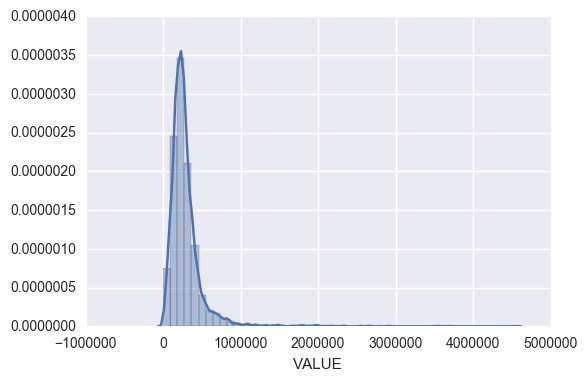

In [22]:
# What does the distribution of sale prices look like?
sns.distplot(data["VALUE"])

The data appears quite skewed to the right. Perhaps I can improve the quality of my model if I transform the data to be more normal.

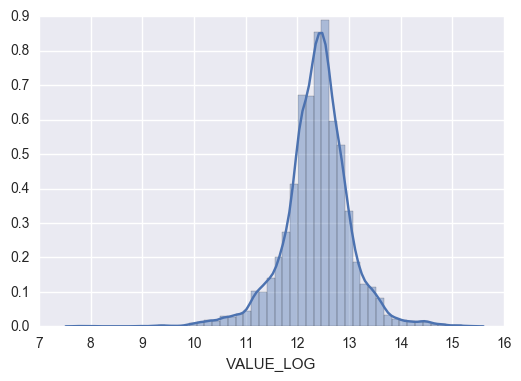

In [23]:
data["VALUE_LOG"] = np.log(data["VALUE"])
sns.distplot(data["VALUE_LOG"])

This looks significantly more normally distrbuted than the un-logged version. I could attempt to use it as the predicted variable in my model later on, but the trade off would be model interpretability.

### Relations between numerical variables

Next up, let's visualize the relationships between the numerical variables in the dataset.

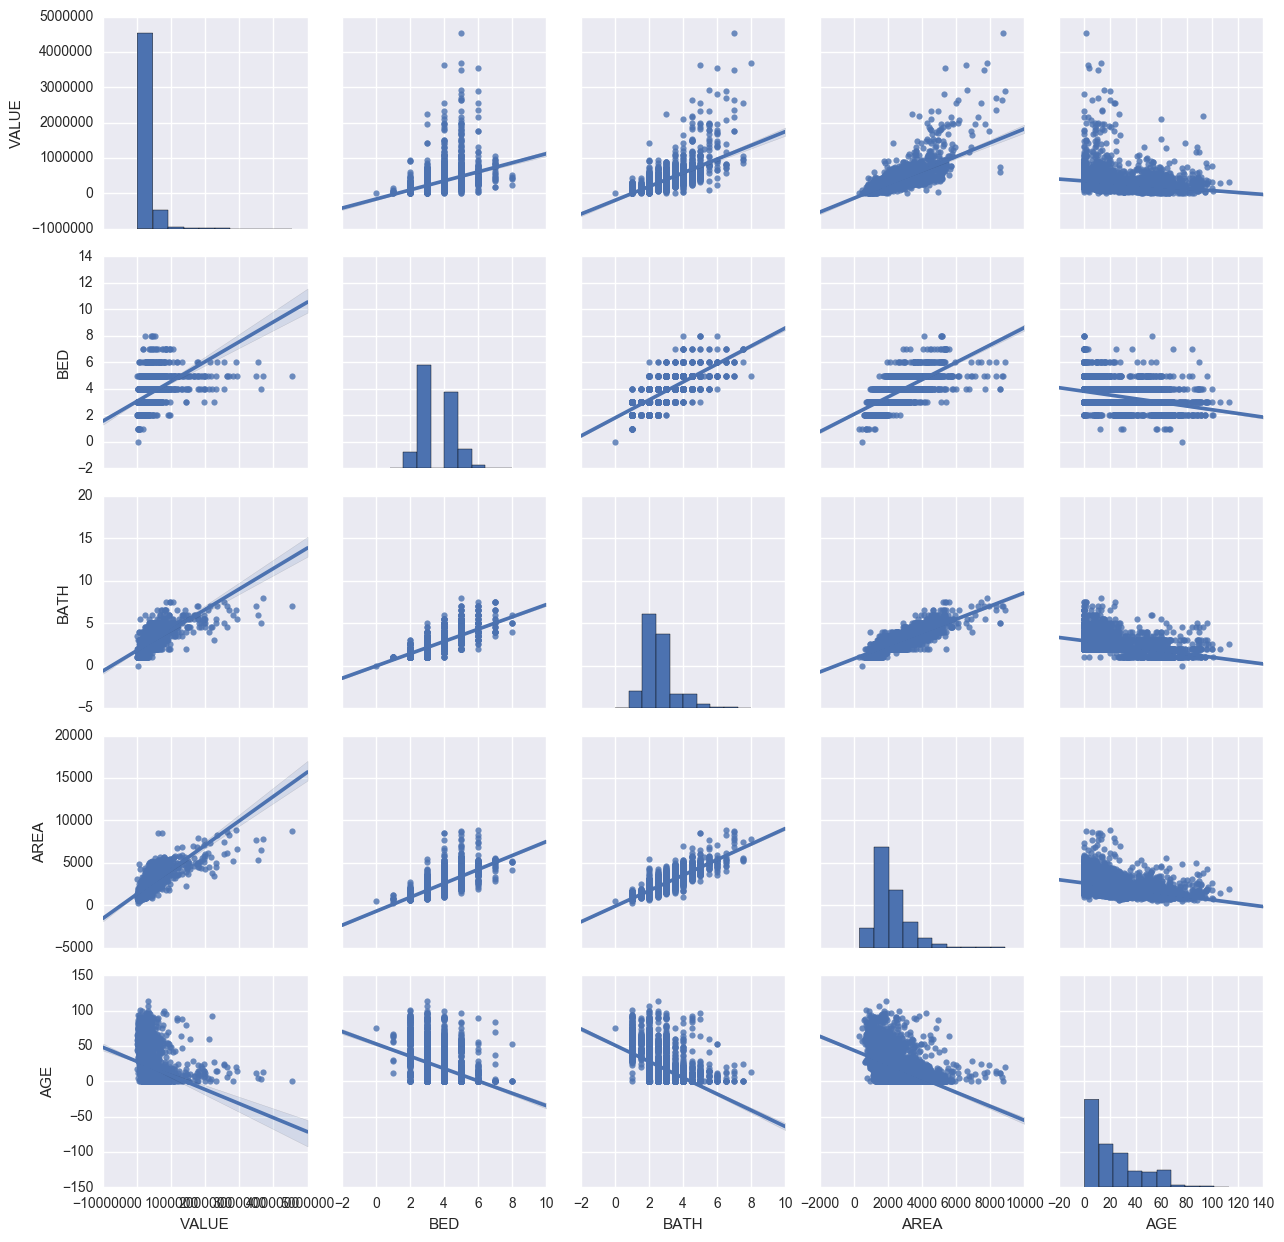

In [24]:
sns.pairplot(data=data.drop(["TYPE", "VALUE_LOG"], axis=1), kind="reg")